### Fijo k, fijo alfa, y defino un intervalo con las cantidades de imágenes que voy a usar para entrenamiento. Las primeras 2 mil las voy a usar para validación.

In [1]:
k = 10
alfa = 15
cantImg = [1]
for i in range(1000,41000,1000):
    cantImg.append(i)

In [2]:
cantImg

[1,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

### Cargo los datos

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_total = pd.read_csv("../data/train.csv")

### Desordeno los datos

In [4]:
df_total = df_total.sample(frac=1, random_state=100)

### Pruebo primero con una sóla imagen de entrenamiento

#### Reduzco el dataset

In [5]:
df_red = df_total[:2001]

In [6]:
df_red

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5883,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38210,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22066,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Uso values para mandar todo a arrays de numpy
X = df_red[df_red.columns[1:]].values
y = df_red["label"].values.reshape(-1, 1)

X.shape, y.shape

((2001, 784), (2001, 1))

#### Aplico PCA

In [8]:
import metnum

pca = metnum.PCA(alfa)
X = pca.transform(X)

#### Me fijo qué aspecto tienen las componentes principales con este dataset reducido

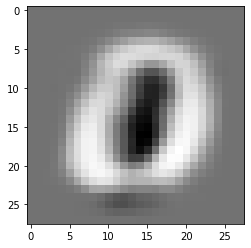

In [9]:
import matplotlib.pyplot as plt

cp = pca.componentesPrincipales()
cp = cp.transpose()
img = cp[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

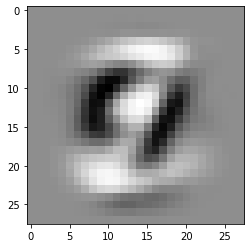

In [10]:
img = cp[1].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Es más o menos igual. Aplico kNN.

In [11]:
X_train, y_train = X[2000:], y[2000:]
X_val, y_val = X[:2000], y[:2000]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 1 instancias de entrenamiento y 2000 de validación


In [12]:
clf = metnum.KNNClassifier(k)
clf.fit(X_train, y_train)

In [13]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.094
CPU times: user 522 ms, sys: 196 ms, total: 718 ms
Wall time: 523 ms


### Ahora pruebo con las cantidades de la lista cantImg

In [14]:
from tqdm import tqdm

resultados = []

for i in tqdm(cantImg):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados.append(acc)

  2%|▏         | 1/41 [00:20<13:48, 20.72s/it]

Ahora tengo 1 instancias de entrenamiento y 2000 de validación
Ahora tengo 1000 instancias de entrenamiento y 2000 de validación


  5%|▍         | 2/41 [00:41<13:23, 20.60s/it]

Ahora tengo 2000 instancias de entrenamiento y 2000 de validación


  7%|▋         | 3/41 [01:03<13:31, 21.35s/it]

Ahora tengo 3000 instancias de entrenamiento y 2000 de validación


 10%|▉         | 4/41 [01:22<12:39, 20.54s/it]

Ahora tengo 4000 instancias de entrenamiento y 2000 de validación


 12%|█▏        | 5/41 [01:43<12:24, 20.67s/it]

Ahora tengo 5000 instancias de entrenamiento y 2000 de validación


 15%|█▍        | 6/41 [02:04<12:10, 20.87s/it]

Ahora tengo 6000 instancias de entrenamiento y 2000 de validación


 17%|█▋        | 7/41 [02:25<11:44, 20.73s/it]

Ahora tengo 7000 instancias de entrenamiento y 2000 de validación


 20%|█▉        | 8/41 [02:48<11:44, 21.35s/it]

Ahora tengo 8000 instancias de entrenamiento y 2000 de validación


 22%|██▏       | 9/41 [03:09<11:25, 21.41s/it]

Ahora tengo 9000 instancias de entrenamiento y 2000 de validación


 24%|██▍       | 10/41 [03:33<11:30, 22.27s/it]

Ahora tengo 10000 instancias de entrenamiento y 2000 de validación


 27%|██▋       | 11/41 [03:57<11:22, 22.76s/it]

Ahora tengo 11000 instancias de entrenamiento y 2000 de validación


 29%|██▉       | 12/41 [04:22<11:20, 23.47s/it]

Ahora tengo 12000 instancias de entrenamiento y 2000 de validación


 32%|███▏      | 13/41 [04:47<11:08, 23.87s/it]

Ahora tengo 13000 instancias de entrenamiento y 2000 de validación


 34%|███▍      | 14/41 [05:11<10:46, 23.95s/it]

Ahora tengo 14000 instancias de entrenamiento y 2000 de validación


 37%|███▋      | 15/41 [05:36<10:26, 24.12s/it]

Ahora tengo 15000 instancias de entrenamiento y 2000 de validación


 39%|███▉      | 16/41 [06:02<10:20, 24.83s/it]

Ahora tengo 16000 instancias de entrenamiento y 2000 de validación


 41%|████▏     | 17/41 [06:29<10:09, 25.41s/it]

Ahora tengo 17000 instancias de entrenamiento y 2000 de validación


 44%|████▍     | 18/41 [06:56<09:52, 25.78s/it]

Ahora tengo 18000 instancias de entrenamiento y 2000 de validación


 46%|████▋     | 19/41 [07:21<09:21, 25.54s/it]

Ahora tengo 19000 instancias de entrenamiento y 2000 de validación


 49%|████▉     | 20/41 [07:46<08:54, 25.47s/it]

Ahora tengo 20000 instancias de entrenamiento y 2000 de validación


 51%|█████     | 21/41 [08:12<08:30, 25.52s/it]

Ahora tengo 21000 instancias de entrenamiento y 2000 de validación


 54%|█████▎    | 22/41 [08:39<08:15, 26.05s/it]

Ahora tengo 22000 instancias de entrenamiento y 2000 de validación


 56%|█████▌    | 23/41 [09:05<07:51, 26.19s/it]

Ahora tengo 23000 instancias de entrenamiento y 2000 de validación


 59%|█████▊    | 24/41 [09:32<07:28, 26.36s/it]

Ahora tengo 24000 instancias de entrenamiento y 2000 de validación


 61%|██████    | 25/41 [10:00<07:10, 26.92s/it]

Ahora tengo 25000 instancias de entrenamiento y 2000 de validación


 63%|██████▎   | 26/41 [10:29<06:51, 27.45s/it]

Ahora tengo 26000 instancias de entrenamiento y 2000 de validación


 66%|██████▌   | 27/41 [10:58<06:31, 27.95s/it]

Ahora tengo 27000 instancias de entrenamiento y 2000 de validación


 68%|██████▊   | 28/41 [11:25<06:00, 27.75s/it]

Ahora tengo 28000 instancias de entrenamiento y 2000 de validación


 71%|███████   | 29/41 [11:55<05:38, 28.18s/it]

Ahora tengo 29000 instancias de entrenamiento y 2000 de validación


 73%|███████▎  | 30/41 [12:26<05:19, 29.06s/it]

Ahora tengo 30000 instancias de entrenamiento y 2000 de validación


 76%|███████▌  | 31/41 [12:57<04:56, 29.62s/it]

Ahora tengo 31000 instancias de entrenamiento y 2000 de validación


 78%|███████▊  | 32/41 [13:28<04:31, 30.22s/it]

Ahora tengo 32000 instancias de entrenamiento y 2000 de validación


 80%|████████  | 33/41 [14:00<04:06, 30.80s/it]

Ahora tengo 33000 instancias de entrenamiento y 2000 de validación


 83%|████████▎ | 34/41 [14:31<03:34, 30.68s/it]

Ahora tengo 34000 instancias de entrenamiento y 2000 de validación


 85%|████████▌ | 35/41 [15:05<03:10, 31.77s/it]

Ahora tengo 35000 instancias de entrenamiento y 2000 de validación


 88%|████████▊ | 36/41 [15:37<02:39, 31.83s/it]

Ahora tengo 36000 instancias de entrenamiento y 2000 de validación


 90%|█████████ | 37/41 [16:08<02:06, 31.67s/it]

Ahora tengo 37000 instancias de entrenamiento y 2000 de validación


 93%|█████████▎| 38/41 [16:44<01:38, 32.77s/it]

Ahora tengo 38000 instancias de entrenamiento y 2000 de validación


 95%|█████████▌| 39/41 [17:18<01:06, 33.25s/it]

Ahora tengo 39000 instancias de entrenamiento y 2000 de validación


 98%|█████████▊| 40/41 [17:53<00:33, 33.65s/it]

Ahora tengo 40000 instancias de entrenamiento y 2000 de validación


100%|██████████| 41/41 [18:30<00:00, 27.08s/it]


In [39]:
resultados

[0.0,
 0.871,
 0.895,
 0.9125,
 0.921,
 0.9275,
 0.933,
 0.9325,
 0.93,
 0.937,
 0.937,
 0.9415,
 0.943,
 0.943,
 0.942,
 0.941,
 0.9435,
 0.943,
 0.9415,
 0.9435,
 0.944,
 0.945,
 0.9465,
 0.9485,
 0.9465,
 0.946,
 0.948,
 0.948,
 0.9485,
 0.947,
 0.9485,
 0.949,
 0.9515,
 0.951,
 0.951,
 0.9535,
 0.9515,
 0.9505,
 0.9515,
 0.9525,
 0.953]

### No sé por qué resultados[0] me da 0.0. Me tendría que haber dado 0.094, como aparece en la celda 13.

### Agrego un par de resultados más para para cantidades entre 2 y 1000.

In [16]:
cantImg2 = [2,25,50,75]
for i in range(100,1000,100):
    cantImg2.append(i)

In [17]:
cantImg2

[2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [18]:
resultados2 = []

for i in tqdm(cantImg2):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados2.append(acc)

  8%|▊         | 1/13 [00:18<03:45, 18.79s/it]

Ahora tengo 2 instancias de entrenamiento y 2000 de validación


 15%|█▌        | 2/13 [00:37<03:26, 18.74s/it]

Ahora tengo 25 instancias de entrenamiento y 2000 de validación


 23%|██▎       | 3/13 [00:56<03:07, 18.73s/it]

Ahora tengo 50 instancias de entrenamiento y 2000 de validación


 38%|███▊      | 5/13 [01:32<02:26, 18.29s/it]

Ahora tengo 75 instancias de entrenamiento y 2000 de validación
Ahora tengo 100 instancias de entrenamiento y 2000 de validación


 46%|████▌     | 6/13 [01:51<02:09, 18.44s/it]

Ahora tengo 200 instancias de entrenamiento y 2000 de validación


 54%|█████▍    | 7/13 [02:09<01:50, 18.50s/it]

Ahora tengo 300 instancias de entrenamiento y 2000 de validación


 62%|██████▏   | 8/13 [02:28<01:33, 18.61s/it]

Ahora tengo 400 instancias de entrenamiento y 2000 de validación


 69%|██████▉   | 9/13 [02:46<01:13, 18.31s/it]

Ahora tengo 500 instancias de entrenamiento y 2000 de validación


 77%|███████▋  | 10/13 [03:03<00:54, 18.11s/it]

Ahora tengo 600 instancias de entrenamiento y 2000 de validación


 85%|████████▍ | 11/13 [03:20<00:35, 17.53s/it]

Ahora tengo 700 instancias de entrenamiento y 2000 de validación


 92%|█████████▏| 12/13 [03:37<00:17, 17.60s/it]

Ahora tengo 800 instancias de entrenamiento y 2000 de validación


100%|██████████| 13/13 [03:56<00:00, 18.21s/it]

Ahora tengo 900 instancias de entrenamiento y 2000 de validación


In [19]:
resultados2

[0.0895,
 0.238,
 0.3585,
 0.514,
 0.6265,
 0.7445,
 0.7795,
 0.8075,
 0.823,
 0.8435,
 0.8545,
 0.861,
 0.862]

### Combino los resultados

In [20]:
todosLosResultados = []

In [21]:
todosLosResultados.append(resultados[0])

In [22]:
todosLosResultados = todosLosResultados + resultados2

In [23]:
todosLosResultados

[0.0,
 0.0895,
 0.238,
 0.3585,
 0.514,
 0.6265,
 0.7445,
 0.7795,
 0.8075,
 0.823,
 0.8435,
 0.8545,
 0.861,
 0.862]

In [24]:
todosLosResultados = todosLosResultados + resultados[1:]

In [25]:
todosLosResultados

[0.0,
 0.0895,
 0.238,
 0.3585,
 0.514,
 0.6265,
 0.7445,
 0.7795,
 0.8075,
 0.823,
 0.8435,
 0.8545,
 0.861,
 0.862,
 0.871,
 0.895,
 0.9125,
 0.921,
 0.9275,
 0.933,
 0.9325,
 0.93,
 0.937,
 0.937,
 0.9415,
 0.943,
 0.943,
 0.942,
 0.941,
 0.9435,
 0.943,
 0.9415,
 0.9435,
 0.944,
 0.945,
 0.9465,
 0.9485,
 0.9465,
 0.946,
 0.948,
 0.948,
 0.9485,
 0.947,
 0.9485,
 0.949,
 0.9515,
 0.951,
 0.951,
 0.9535,
 0.9515,
 0.9505,
 0.9515,
 0.9525,
 0.953]

### Ahora grafico esto

In [26]:
cantidades = []

In [27]:
cantidades.append(1)

In [28]:
cantidades

[1]

In [29]:
cantidades = cantidades + cantImg2

In [30]:
cantidades

[1, 2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [31]:
cantidades = cantidades + cantImg[1:]

In [32]:
cantidades

[1,
 2,
 25,
 50,
 75,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

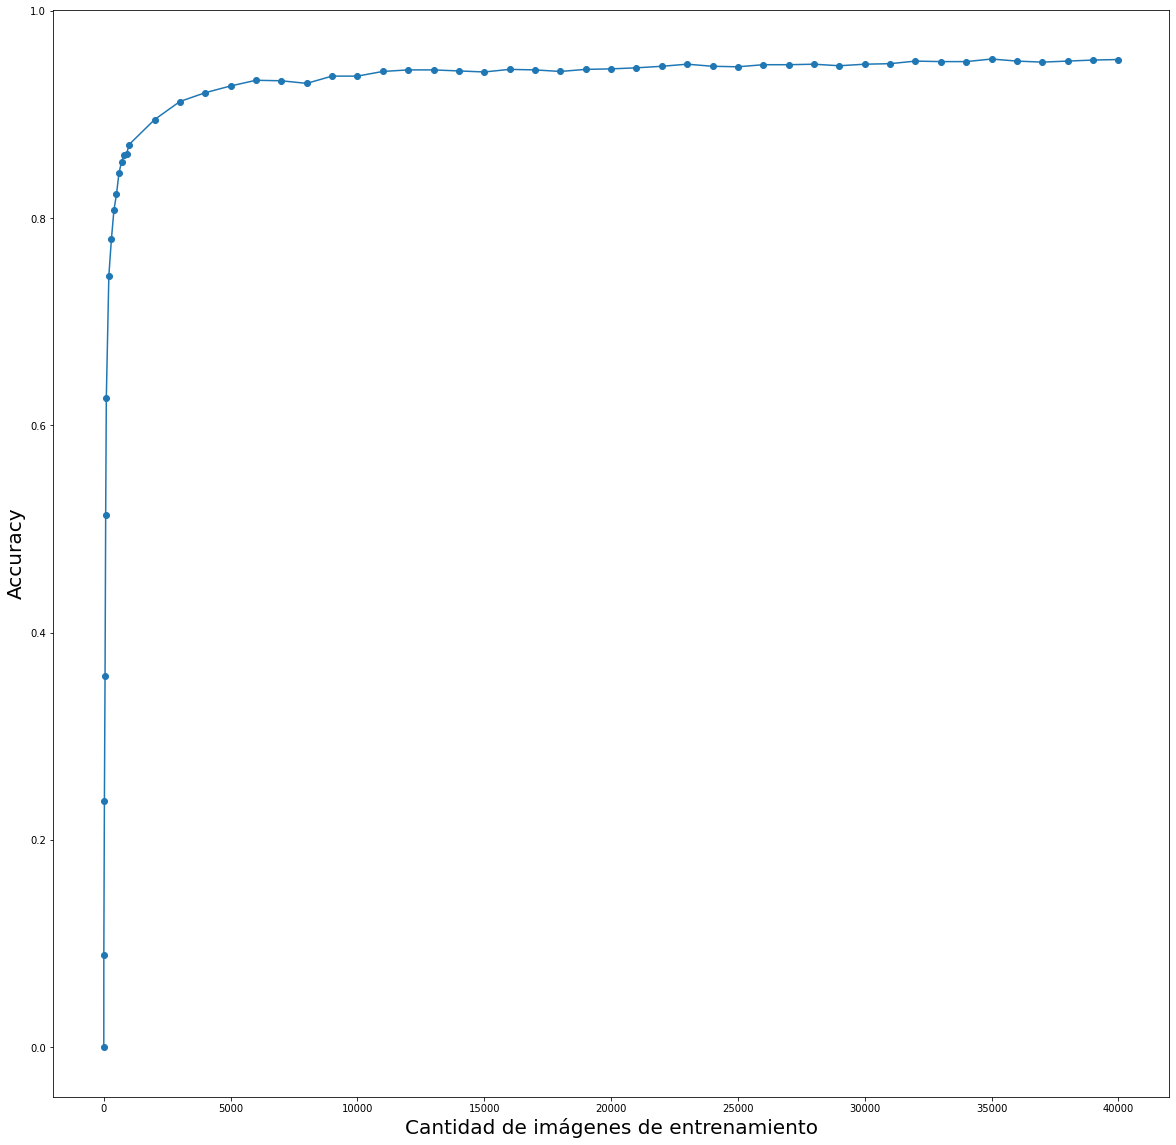

In [38]:
plt.scatter(cantidades,todosLosResultados)
plt.plot(cantidades,todosLosResultados)
plt.rcParams["figure.figsize"] = [20,20]
plt.xlabel('Cantidad de imágenes de entrenamiento', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.savefig("cambio_cant_imagenes.png", bbox_inches='tight')